# IMPORT LIBRARY

In [16]:
import numpy
from keras.datasets import imdb
from matplotlib import pyplot
pyplot.style.use('fivethirtyeight')
pyplot.style.use('dark_background')
import numpy
from keras.datasets import imdb
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import Flatten
from keras.layers.embeddings import Embedding
from keras.preprocessing import sequence
from keras.layers.convolutional import Conv1D
from keras.layers.convolutional import MaxPooling1D
import warnings
warnings.filterwarnings('ignore')

# LOAD DATA

In [2]:
(X_train, y_train), (X_test, y_test) = imdb.load_data()
X = numpy.concatenate((X_train, X_test), axis=0)
y = numpy.concatenate((y_train, y_test), axis=0)

print(f"shape of X: {X.shape}")
print(f"shape of y: {y.shape}")

17473536/17464789 [==============================] - 24s 1us/step
shape of X: (50000,)
shape of y: (50000,)


In [3]:
# Specify The Number Of Classes
print("Classes: ")
print(numpy.unique(y))

Classes: 
[0 1]


In [4]:
# Specify The Number Of Unique Words
print("Number of words: ")
print(len(numpy.unique(numpy.hstack(X))))

Number of words: 
88585


In [5]:
# Calculate The Mean And Standard Deviation Of Comments
print("Review length: ")
result = [len(x) for x in X]
print("Mean %.2f words (%f)" % (numpy.mean(result), numpy.std(result)))

Review length: 
Mean 234.76 words (172.911495)


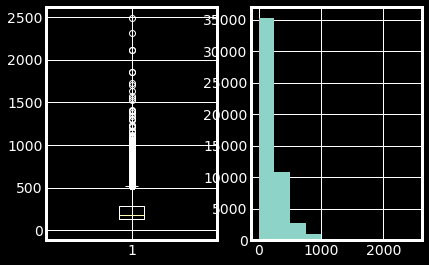

In [6]:
# Draw The Length Of The Comments With Box Charts And Histgram
pyplot.subplot(121)
pyplot.boxplot(result)
pyplot.subplot(122)
pyplot.hist(result)
pyplot.show()

In [7]:
seed = 7
numpy.random.seed(seed)

In [9]:
top_words = 5000
max_words = 500

(X_train, y_train), (X_test, y_test) = imdb.load_data(nb_words=top_words)
print(f"shape of X_train: {X_train.shape}")
print(f"shape of y_train: {y_train.shape}")
print(f"shape of X_test: {X_test.shape}")
print(f"shape of y_test: {y_test.shape}")

shape of X_train: (25000,)
shape of y_train: (25000,)
shape of X_test: (25000,)
shape of y_test: (25000,)


In [10]:
# Only Load the Top 5,000 words in the IMDB Review
X_train = sequence.pad_sequences(X_train, maxlen=max_words)
X_test = sequence.pad_sequences(X_test, maxlen=max_words)

# CREATE MLP MODEL

In [11]:
model = Sequential()
model.add(Embedding(top_words, 32, input_length=max_words))
model.add(Flatten())
model.add(Dense(250, activation= 'relu' ))
model.add(Dense(1, activation= 'sigmoid' ))
model.compile(loss= 'binary_crossentropy' , optimizer= 'adam' , metrics=['accuracy'])
print(model.summary())

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding (Embedding)        (None, 500, 32)           160000    
_________________________________________________________________
flatten (Flatten)            (None, 16000)             0         
_________________________________________________________________
dense (Dense)                (None, 250)               4000250   
_________________________________________________________________
dense_1 (Dense)              (None, 1)                 251       
Total params: 4,160,501
Trainable params: 4,160,501
Non-trainable params: 0
_________________________________________________________________
None


In [12]:
# Fit the model
model.fit(X_train, y_train, validation_data=(X_test, y_test), epochs=3, batch_size=32, verbose=1)

Epoch 1/3
782/782 [==============================] - 43s 36ms/step - loss: 0.5407 - accuracy: 0.6871 - val_loss: 0.3045 - val_accuracy: 0.8712
Epoch 2/3
782/782 [==============================] - 27s 35ms/step - loss: 0.1350 - accuracy: 0.9540 - val_loss: 0.3766 - val_accuracy: 0.8598
Epoch 3/3
782/782 [==============================] - 29s 37ms/step - loss: 0.0281 - accuracy: 0.9932 - val_loss: 0.5759 - val_accuracy: 0.8518


In [13]:
# Final evaluation of the model
scores = model.evaluate(X_test, y_test, verbose=0)
print("Accuracy: %.2f%%" % (scores[1]*100))

Accuracy: 85.18%


# CNN FOR IMDB 

In [18]:
model = Sequential()
model.add(Embedding(top_words, 32, input_length= max_words))
model.add(Conv1D(filters=32, kernel_size=3, padding= 'same', activation= 'relu' ))
model.add(MaxPooling1D(pool_size=2))
model.add(Flatten())
model.add(Dense(250, activation= 'relu' ))
model.add(Dense(1, activation= 'sigmoid' ))

In [19]:
model.compile(loss= 'binary_crossentropy' , optimizer= 'adam' , metrics=['accuracy'])
print(model.summary())

Model: "sequential_4"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding_4 (Embedding)      (None, 500, 32)           160000    
_________________________________________________________________
conv1d_1 (Conv1D)            (None, 500, 32)           3104      
_________________________________________________________________
max_pooling1d (MaxPooling1D) (None, 250, 32)           0         
_________________________________________________________________
flatten_1 (Flatten)          (None, 8000)              0         
_________________________________________________________________
dense_2 (Dense)              (None, 250)               2000250   
_________________________________________________________________
dense_3 (Dense)              (None, 1)                 251       
Total params: 2,163,605
Trainable params: 2,163,605
Non-trainable params: 0
____________________________________________

In [20]:
# Fit the model
model.fit(X_train, y_train, validation_data=(X_test, y_test), epochs=3, batch_size=32, verbose=1)

Epoch 1/3
782/782 [==============================] - 30s 35ms/step - loss: 0.4783 - accuracy: 0.7356 - val_loss: 0.2638 - val_accuracy: 0.8884
Epoch 2/3
782/782 [==============================] - 31s 40ms/step - loss: 0.1861 - accuracy: 0.9310 - val_loss: 0.2701 - val_accuracy: 0.8895
Epoch 3/3
782/782 [==============================] - 32s 41ms/step - loss: 0.0885 - accuracy: 0.9712 - val_loss: 0.3575 - val_accuracy: 0.8771


In [21]:
#Final evaluation of the model
scores = model.evaluate(X_test, y_test, verbose=0)
print("Accuracy: %.2f%%" % (scores[1]*100))

Accuracy: 87.71%
